### Reference Link 
https://aneeshvaradan.medium.com/a-very-simple-monte-carlo-simulation-in-linear-regression-86bbf6f60fcc

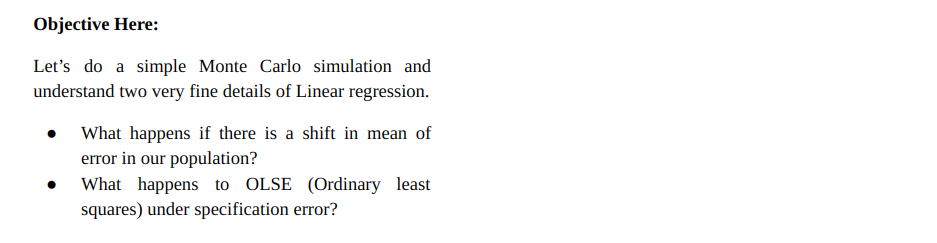

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import expon
plt.style.use('ggplot')

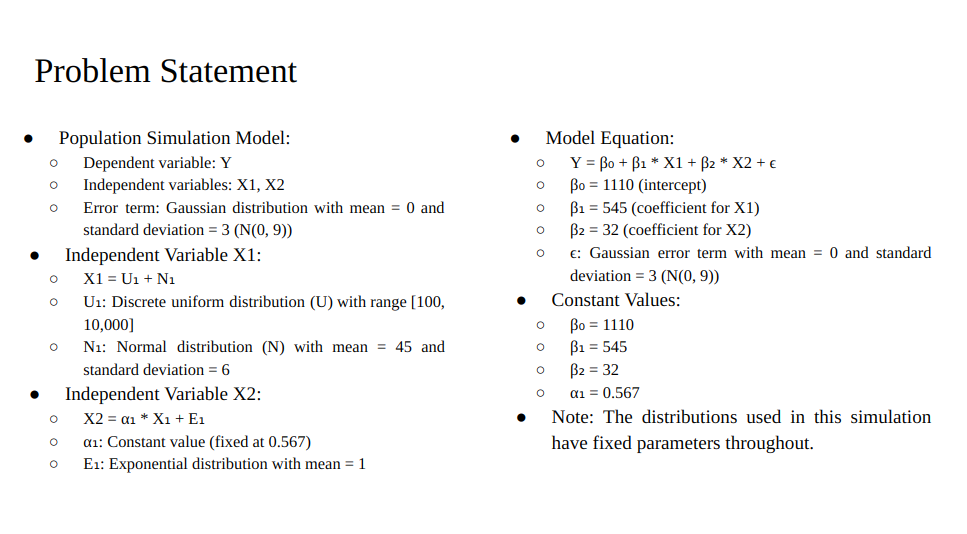

### Lets run the first simulation.

In [2]:
a1 = 0.567
b0 = 1110
b1 = 545
b2 = 32
incpt =  []
sl1   =  []
sl2   =  []
for _ in range(0,600):
  X1 = np.random.randint(low=100,high=10000,size=500)+np.random.normal(scale=6,size=500)
  X2 = a1*X1 + expon.rvs(size=500)
  X  = np.array([X1,X2]).T
  Y  = b0 + b1*X1 + b2*X2 + np.random.normal(scale=9,size=500)
  reg=LinearRegression().fit(X,Y)
  incpt.append(reg.intercept_)
  sl1.append(reg.coef_[0])
  sl2.append(reg.coef_[1])

### Lets visualize the obtained results.

Text(32.24362701503071, 20, 'Mean: 32.01')

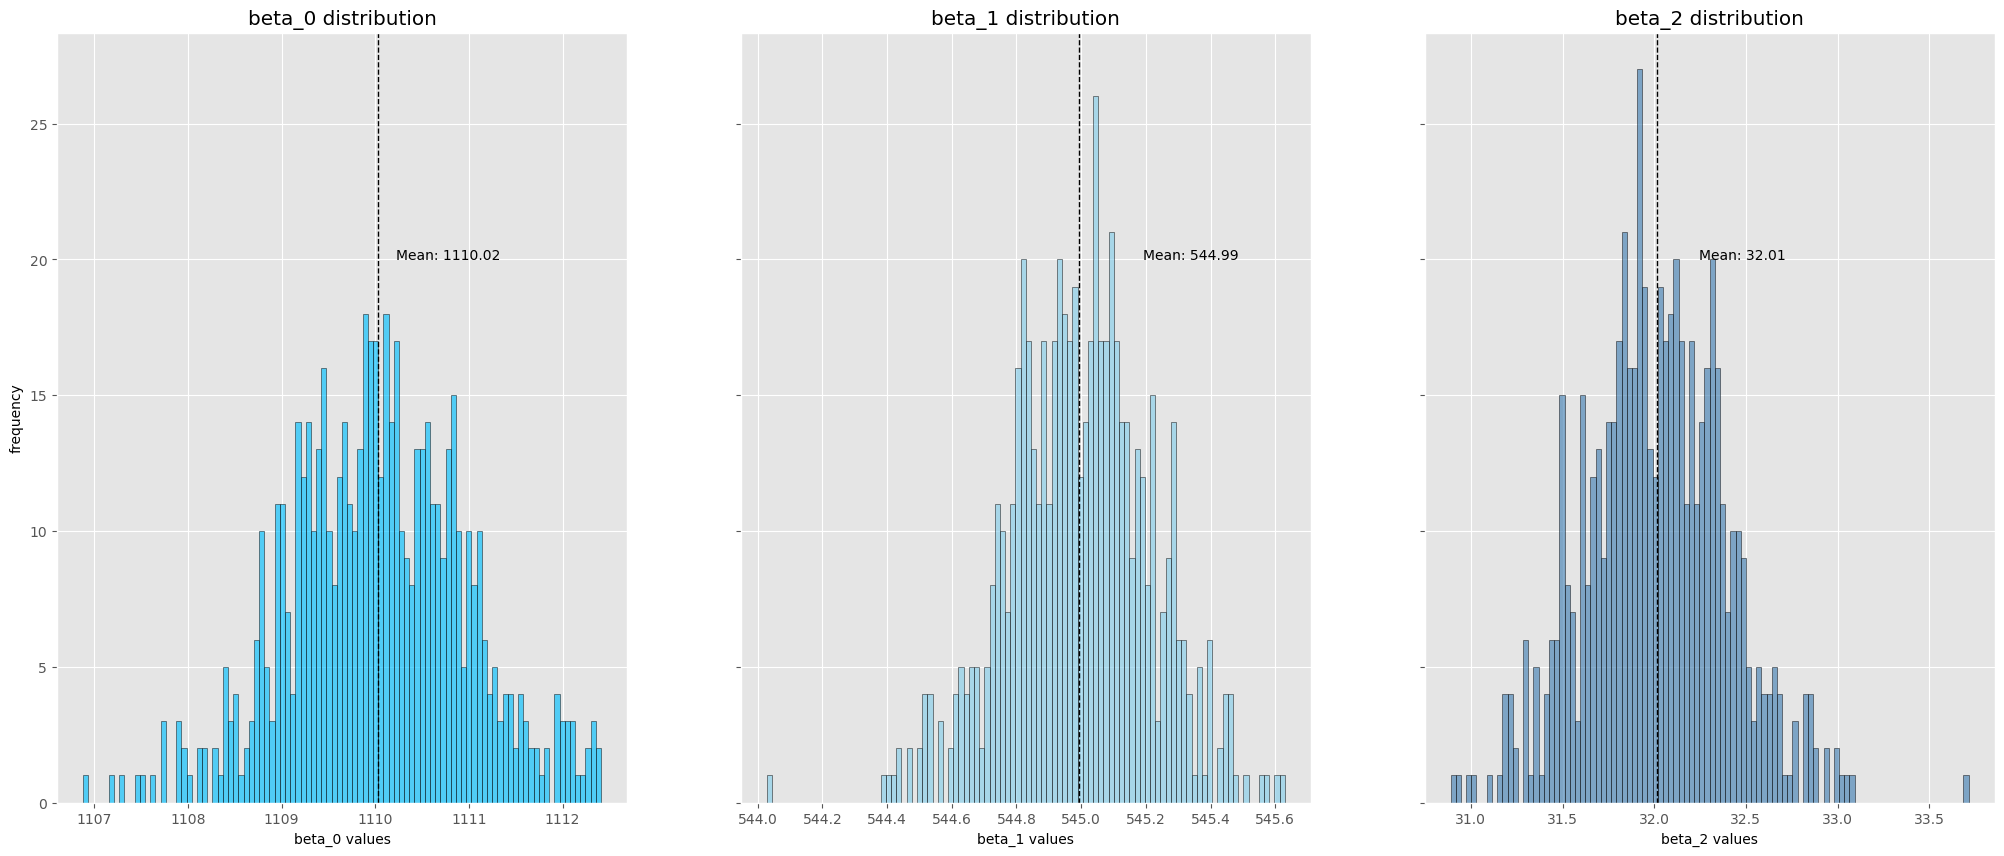

In [3]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(25, 10))
ax1.hist(incpt, bins=100, color='deepskyblue', edgecolor='k', alpha=0.65)
ax2.hist(sl1, bins=100, color='skyblue', edgecolor='k', alpha=0.65)
ax3.hist(sl2, bins=100, color='steelblue', edgecolor='k', alpha=0.65)
ax1.axvline(np.array(incpt).mean(),color='k',linestyle='dashed', linewidth=1)
ax2.axvline(np.array(sl1).mean(),color='k',linestyle='dashed', linewidth=1)
ax3.axvline(np.array(sl2).mean(),color='k', linestyle='dashed', linewidth=1)
_, y_max = ax1.get_ylim()
ax1.set_title('beta_0 distribution')
ax1.set_xlabel('beta_0 values')
ax1.set_ylabel('frequency')
ax2.set_title('beta_1 distribution')
ax2.set_xlabel('beta_1 values')
ax3.set_title('beta_2 distribution')
ax3.set_xlabel('beta_2 values')
ax1.text(x=np.array(incpt).mean()+0.2,y=20,s='Mean: {:.2f}'.format(np.array(incpt).mean()))
ax2.text(x=np.array(sl1).mean()+0.2,y=20,s='Mean: {:.2f}'.format(np.array(sl1).mean()))
ax3.text(x=np.array(sl2).mean()+0.23,y=20,s='Mean: {:.2f}'.format(np.array(sl2).mean()))

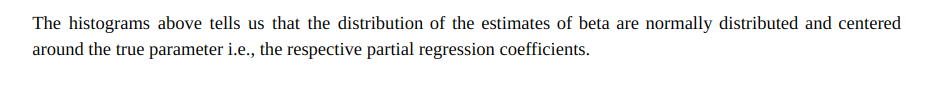

### Making changes to this idealized situation.

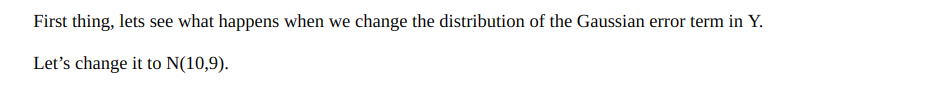

plot


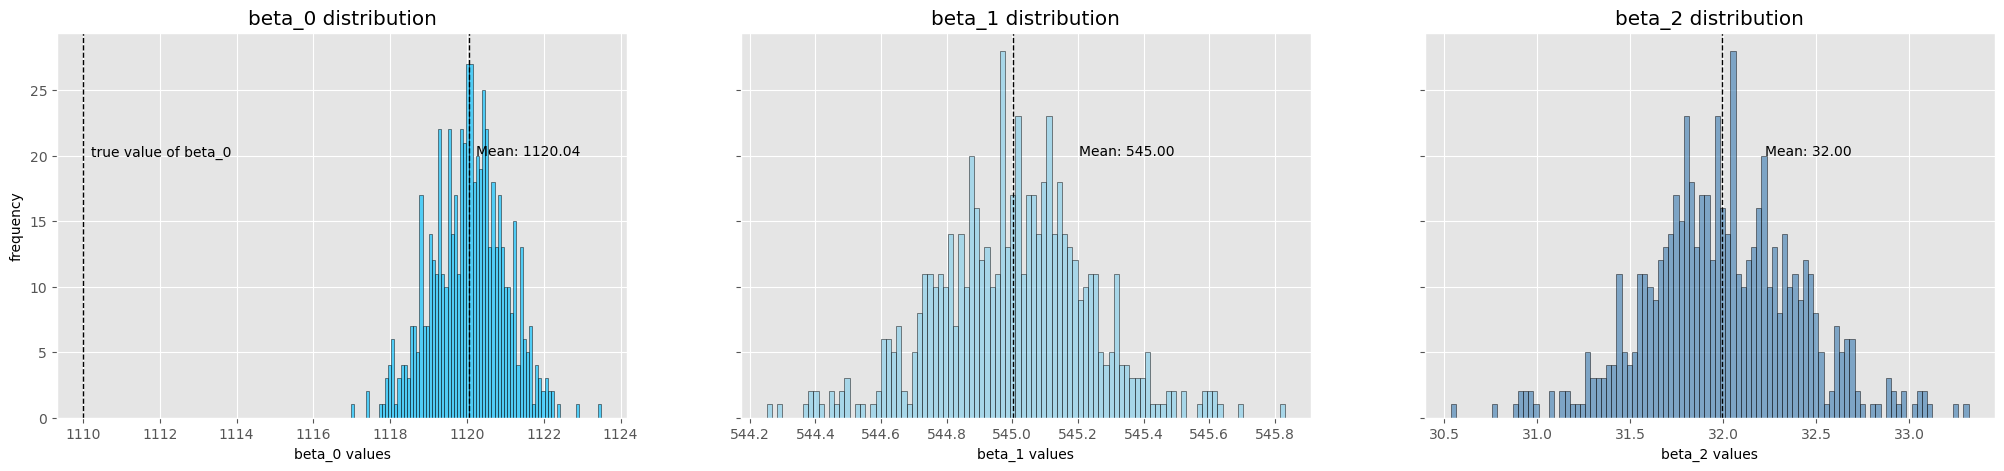

In [4]:
a1 = 0.567
b0 = 1110
b1 = 545
b2 = 32
incpt =  []
sl1   =  []
sl2   =  []
for _ in range(0,600):
  X1 = np.random.randint(low=100,high=10000,size=500)+np.random.normal(scale=6,size=500)
  X2 = a1*X1 + expon.rvs(size=500)
  X  = np.array([X1,X2]).T
  Y  = b0 + b1*X1 + b2*X2 + np.random.normal(loc=10,scale=9,size=500)
  reg=LinearRegression().fit(X,Y)
  incpt.append(reg.intercept_)
  sl1.append(reg.coef_[0])
  sl2.append(reg.coef_[1])
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(25, 5))
ax1.hist(incpt, bins=80, color='deepskyblue', edgecolor='k', alpha=0.65)
ax2.hist(sl1, bins=100, color='skyblue', edgecolor='k', alpha=0.65)
ax3.hist(sl2, bins=100, color='steelblue', edgecolor='k', alpha=0.65)
ax1.axvline(np.array(incpt).mean(),color='k',linestyle='dashed', linewidth=1)
ax1.axvline(1110,color='k',linestyle='dashed', linewidth=1)
ax2.axvline(np.array(sl1).mean(),color='k',linestyle='dashed', linewidth=1)
ax3.axvline(np.array(sl2).mean(),color='k', linestyle='dashed', linewidth=1)
_, y_max = ax1.get_ylim()
ax1.set_title('beta_0 distribution')
ax1.set_xlabel('beta_0 values')
ax1.set_ylabel('frequency')
ax2.set_title('beta_1 distribution')
ax2.set_xlabel('beta_1 values')
ax3.set_title('beta_2 distribution')
ax3.set_xlabel('beta_2 values')
ax1.text(x=np.array(incpt).mean()+0.2,y=20,s='Mean: {:.2f}'.format(np.array(incpt).mean()))
ax1.text(x=1110.2,y=20,s='true value of beta_0')
ax2.text(x=np.array(sl1).mean()+0.2,y=20,s='Mean: {:.2f}'.format(np.array(sl1).mean()))
ax3.text(x=np.array(sl2).mean()+0.23,y=20,s='Mean: {:.2f}'.format(np.array(sl2).mean()))
print('plot')

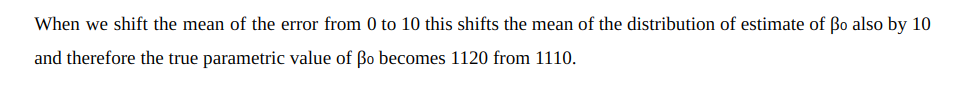

### Specification Bias

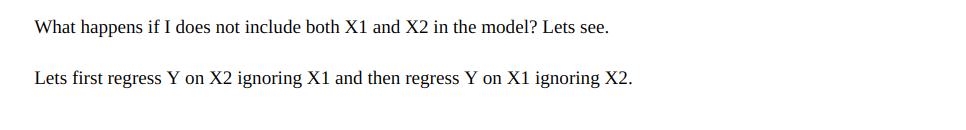

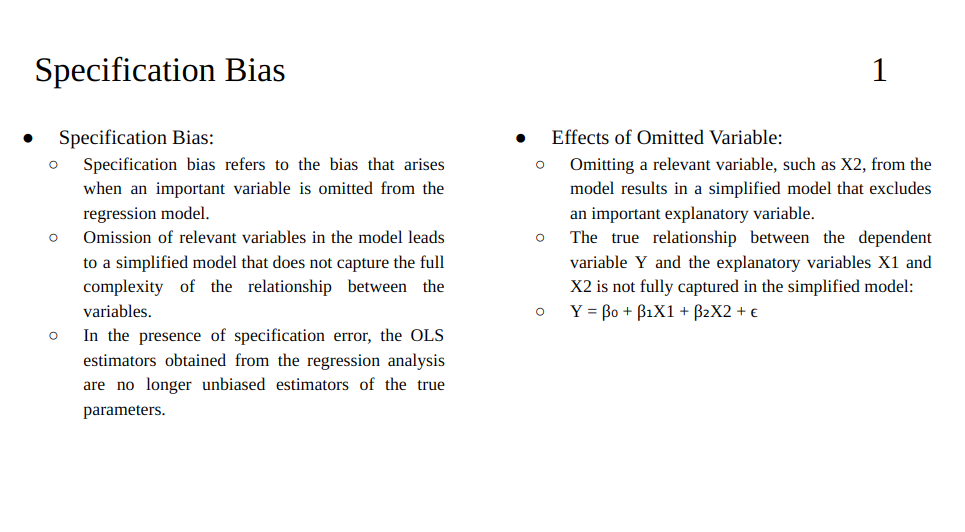

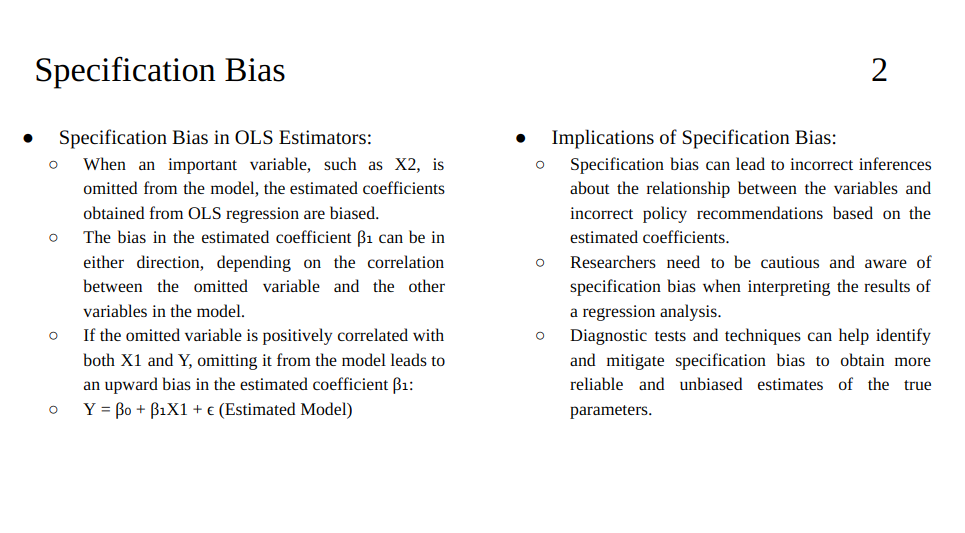

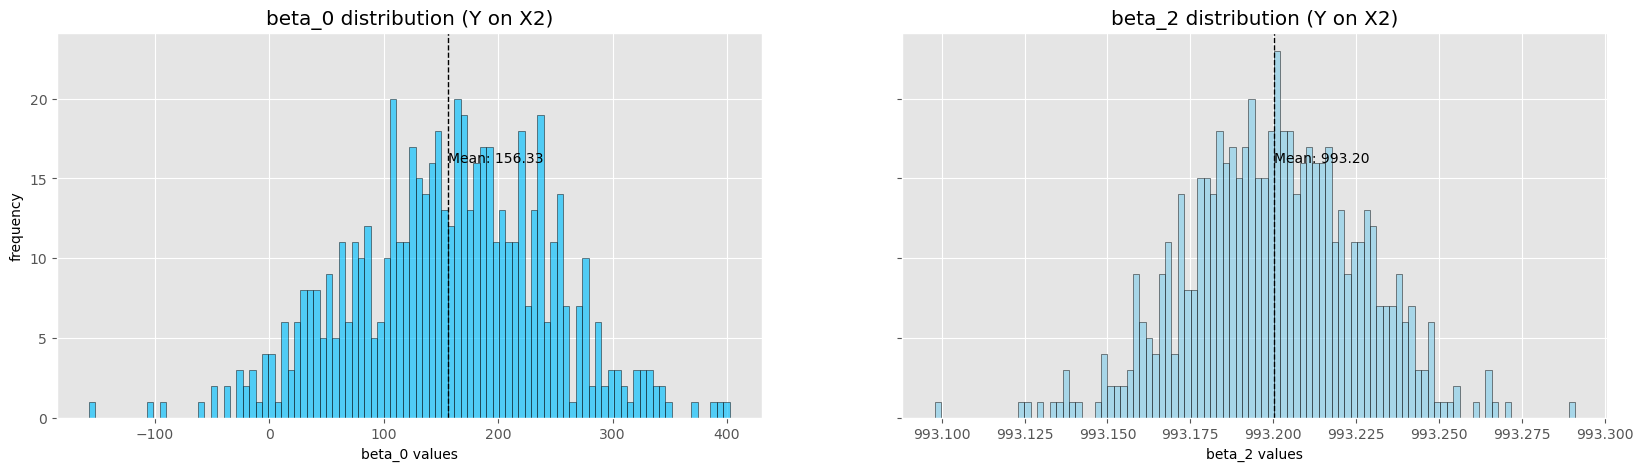

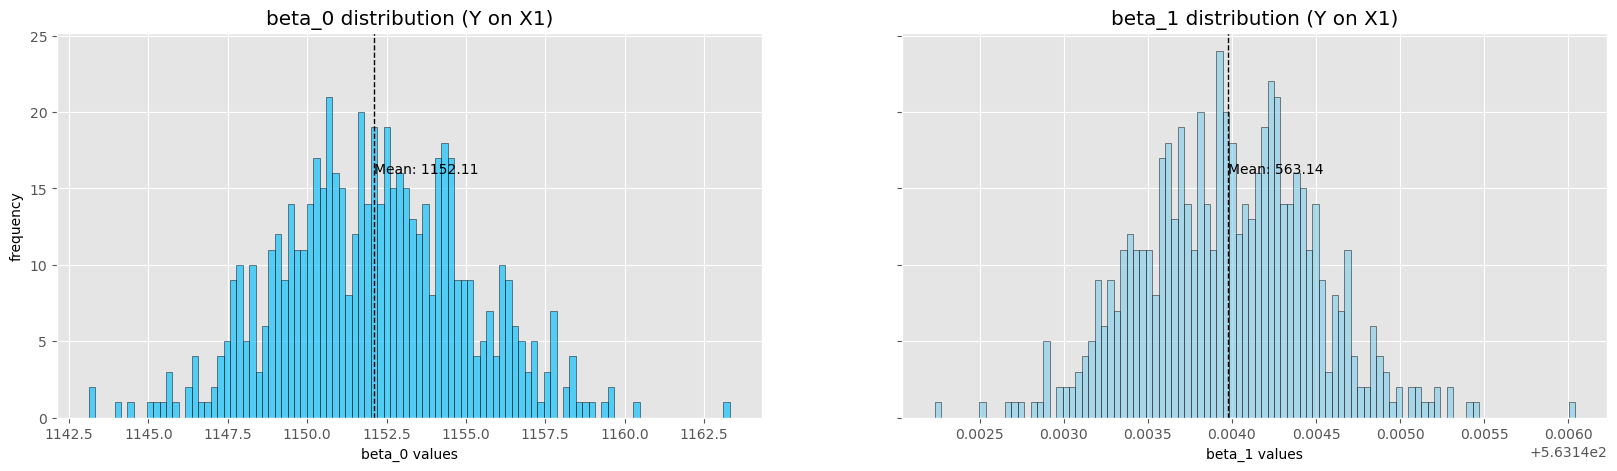

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from sklearn.linear_model import LinearRegression

a1 = 0.567
b0 = 1110
b1 = 545
b2 = 32
incpt_X2 = []
sl1_X2 = []
incpt_X1 = []
sl1_X1 = []

for _ in range(0, 600):
    X1 = np.random.randint(low=100, high=10000, size=500) + np.random.normal(scale=6, size=500)
    X2 = a1 * X1 + expon.rvs(size=500)
    Y = b0 + b1 * X1 + b2 * X2 + np.random.normal(loc=10, scale=9, size=500)
    
    reg_X2 = LinearRegression().fit(X2.reshape(-1, 1), Y)
    incpt_X2.append(reg_X2.intercept_)
    sl1_X2.append(reg_X2.coef_[0])
    
    reg_X1 = LinearRegression().fit(X1.reshape(-1, 1), Y)
    incpt_X1.append(reg_X1.intercept_)
    sl1_X1.append(reg_X1.coef_[0])

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
ax1.hist(incpt_X2, bins=100, color='deepskyblue', edgecolor='k', alpha=0.65)
ax2.hist(sl1_X2, bins=100, color='skyblue', edgecolor='k', alpha=0.65)
ax1.axvline(np.array(incpt_X2).mean(), color='k', linestyle='dashed', linewidth=1)
ax2.axvline(np.array(sl1_X2).mean(), color='k', linestyle='dashed', linewidth=1)
_, y_max = ax1.get_ylim()
ax1.set_title('beta_0 distribution (Y on X2)')
ax1.set_xlabel('beta_0 values')
ax1.set_ylabel('frequency')
ax2.set_title('beta_2 distribution (Y on X2)')
ax2.set_xlabel('beta_2 values')
ax1.text(x=np.array(incpt_X2).mean(), y=16, s='Mean: {:.2f}'.format(np.array(incpt_X2).mean()))
ax2.text(x=np.array(sl1_X2).mean(), y=16, s='Mean: {:.2f}'.format(np.array(sl1_X2).mean()))

fig, (ax3, ax4) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
ax3.hist(incpt_X1, bins=100, color='deepskyblue', edgecolor='k', alpha=0.65)
ax4.hist(sl1_X1, bins=100, color='skyblue', edgecolor='k', alpha=0.65)
ax3.axvline(np.array(incpt_X1).mean(), color='k', linestyle='dashed', linewidth=1)
ax4.axvline(np.array(sl1_X1).mean(), color='k', linestyle='dashed', linewidth=1)
_, y_max = ax3.get_ylim()
ax3.set_title('beta_0 distribution (Y on X1)')
ax3.set_xlabel('beta_0 values')
ax3.set_ylabel('frequency')
ax4.set_title('beta_1 distribution (Y on X1)')
ax4.set_xlabel('beta_1 values')
ax3.text(x=np.array(incpt_X1).mean(), y=16, s='Mean: {:.2f}'.format(np.array(incpt_X1).mean()))
ax4.text(x=np.array(sl1_X1).mean(), y=16, s='Mean: {:.2f}'.format(np.array(sl1_X1).mean()))

plt.show()


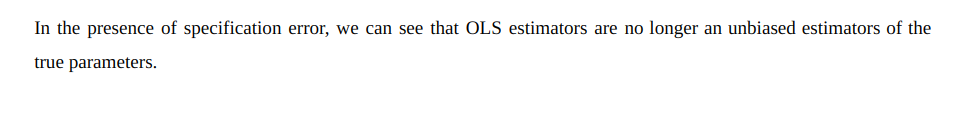

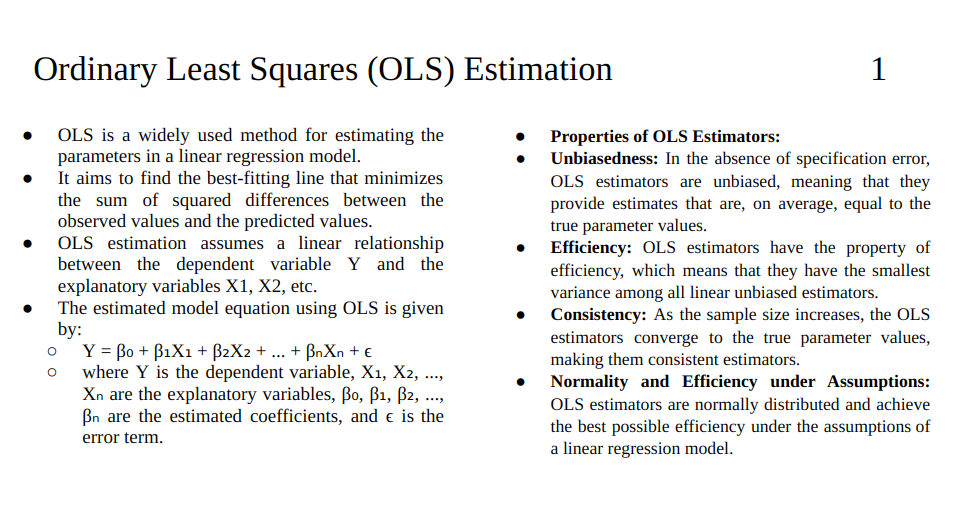

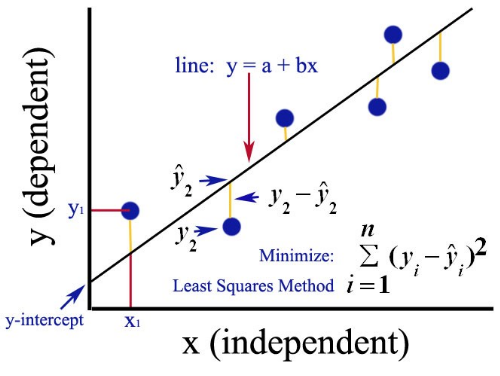

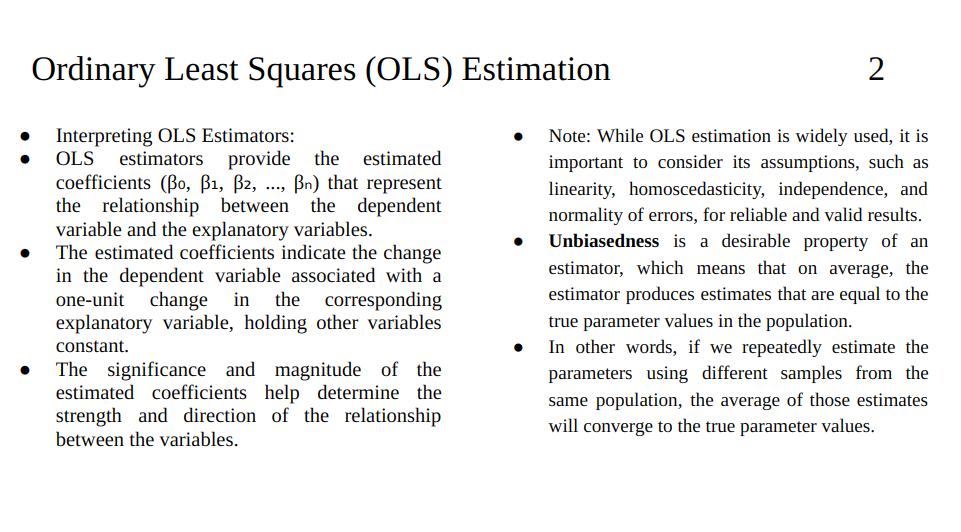